## Automated Petrophysics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import easygui

In [2]:
data=pd.read_csv("cutter-1_final_UPDATE_1.csv")

In [3]:
data

,DEPTH_M,DEPTH_F,BS,CALI,DENS,DRHO,DTC,DTS,GR,NEUT,PEF,RESD,RESM,RESS,TEMP,TENS
0,2499.8172,8201.5003,12.5,12.1779,2.4484,0.019703,89.2881,146.9877,103.6568,0.255953,2.5113,6.2885,6.0840,5.9969,70.0,1663.2195
1,2499.9696,8202.0003,12.5,12.1779,2.4514,0.019951,89.7513,147.1076,101.6434,0.256040,2.4938,6.5668,6.3479,6.2982,70.0,1658.8743
2,2500.1220,8202.5003,12.5,12.1779,2.4637,0.020000,89.9181,146.9753,100.2239,0.261165,2.5891,6.7277,6.5280,6.4874,70.0,1658.9932
3,2500.2744,8203.0003,12.5,12.1779,2.4783,0.020000,90.0109,146.7802,98.9525,0.267546,2.7125,6.8593,6.6873,6.6486,70.0,1660.2244
4,2500.4268,8203.5003,12.5,12.1779,2.4928,0.020000,90.1037,146.5851,97.6811,0.273926,2.8359,6.9909,6.8466,6.8098,70.0,1661.4556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,2590.3428,8498.5003,12.5,12.5547,2.3811,0.036466,98.1759,156.0670,91.6121,0.271432,2.6178,1.9883,1.9567,1.9310,73.0,1733.9773
595,2590.4952,8499.0003,12.5,12.6257,2.3804,0.030479,98.7964,155.4981,89.6507,0.274363,2.5737,2.0110,1.9709,1.9229,73.0,1742.0630
596,2590.6476,8499.5003,12.5,12.6660,2.3891,0.030205,99.6781,155.3015,90.0974,0.265027,2.6503,2.0540,2.0148,1.9774,73.0,1746.0934
597,2590.8000,8500.0003,12.5,12.7053,2.3981,0.030116,100.5684,155.1171,90.6224,0.255293,2.7309,2.0977,2.0596,2.0340,73.0,1749.9921


In [4]:
data.head()

,DEPTH_M,DEPTH_F,BS,CALI,DENS,DRHO,DTC,DTS,GR,NEUT,PEF,RESD,RESM,RESS,TEMP,TENS
0,2499.8172,8201.5003,12.5,12.1779,2.4484,0.019703,89.2881,146.9877,103.6568,0.255953,2.5113,6.2885,6.0840,5.9969,70.0,1663.2195
1,2499.9696,8202.0003,12.5,12.1779,2.4514,0.019951,89.7513,147.1076,101.6434,0.256040,2.4938,6.5668,6.3479,6.2982,70.0,1658.8743
2,2500.1220,8202.5003,12.5,12.1779,2.4637,0.020000,89.9181,146.9753,100.2239,0.261165,2.5891,6.7277,6.5280,6.4874,70.0,1658.9932
3,2500.2744,8203.0003,12.5,12.1779,2.4783,0.020000,90.0109,146.7802,98.9525,0.267546,2.7125,6.8593,6.6873,6.6486,70.0,1660.2244
4,2500.4268,8203.5003,12.5,12.1779,2.4928,0.020000,90.1037,146.5851,97.6811,0.273926,2.8359,6.9909,6.8466,6.8098,70.0,1661.4556


In [5]:
depth_M = data['DEPTH_M']
depth_F = data['DEPTH_F']
BS = data['BS']
ECGR = data['GR']
RHOB = data['DENS']
NPHI = data['NEUT']
RT = data['RESD']
DTCO = data['DTC']
temp = data['TEMP']
temp_F = (temp * (9/5)) + 32

## Calculatuion of Vshale

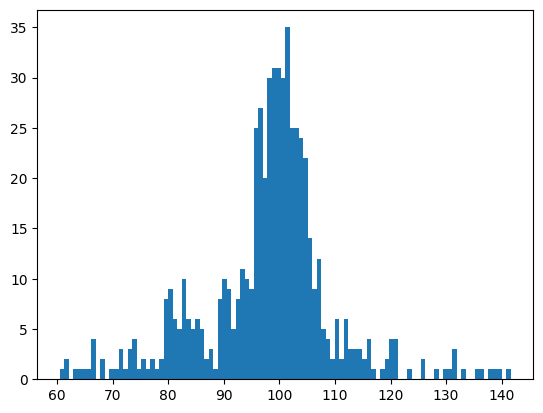

In [6]:
plt.hist(ECGR, bins=100)
plt.show()


In [7]:
# Calculation of Vshale
GR_MAX = np.max(ECGR)
GR_MIN = np.min(ECGR)
Vshale = (ECGR - (GR_MIN - 5)) / ((GR_MAX + 5) - (GR_MIN - 5))


In [8]:
Vshale

0      0.528370
1      0.506279
2      0.490704
3      0.476754
4      0.462805
         ...   
594    0.396216
595    0.374695
596    0.379597
597    0.385357
598    0.391117
Name: GR, Length: 599, dtype: float64

In [9]:
# change into numericals
NPHI = NPHI.to_numpy()
RHOB = RHOB.to_numpy()
depth_F = depth_F.to_numpy()
Vshale = Vshale.to_numpy()
RT = RT.to_numpy()
BS= BS.to_numpy()
ECGR = ECGR.to_numpy()
depth_M = depth_M.to_numpy()
DTCO = DTCO.to_numpy()
temp = temp.to_numpy()

In [10]:
# Initialize some parameters
LENGTH=len(ECGR)

DPHI = np.zeros(LENGTH)
RHOM = np.zeros(LENGTH)
vQ = np.zeros(LENGTH)
B = np.zeros(LENGTH)
CEC = np.zeros(LENGTH)
Qv = np.zeros(LENGTH)
Ccw = np.zeros(LENGTH)
Form_F = np.zeros(LENGTH)
f_pres_record = np.zeros(LENGTH)
CILD = np.zeros(LENGTH)
num_lines = 1


In [11]:
# Define prompts for user input
prompts = ['Enter the kelly bushing[KB] depth(m)',
           'Enter Thickness of water column[WD](m)',
           'Enter Grain Density [RHO_G](g/cm3)',
           'Enter Shale Density [RHO_SH](g/cm3)',
           'Enter oil Density [rhof_oil](g/cm3)',
           'Enter gas Density [rhof_gas](g/cm3)',
           'Enter mud filtrate density [rhof_mudf] (g/cm3)']

# Display GUI dialog for user input
a = easygui.multenterbox(msg='Input', title='Input', fields=prompts)

# Convert user input to numeric values
KB = float(a[0])
WD = float(a[1])
RHO_G = float(a[2])
RHO_SH = float(a[3])
rhof_oil = float(a[4])
rhof_gas = float(a[5])
rhof_mudf = float(a[6])

 # KB=22;
 # WD=116;
 # RHO_G=2.65;
 # RHO_SH=2.7;
 # rhof_oil=0.88;
 # rhof_gas=0.24;
 # rhof_mudf=1.19;


## Calculation of Preprocessing Parameters



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

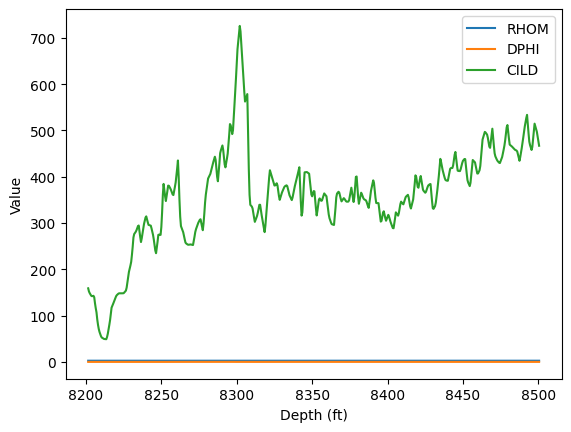

In [12]:
# import numpy as np

# Constants and initial parameters
pressureMSL = 101325  # Pressure at sea level in Pa
IntialDepth_m = 2499.8172  # Initial depth in meters

# Example data (replace with actual data)
LENGTH = len(depth_F)  # Assuming depth_F is already defined
f_pres_record = np.zeros(LENGTH)

# Initial calculations
f_pres = 101325 + (WD * 0.43 * 6894.76) + (IntialDepth_m - (KB + WD)) * (1 * 6894.76)
TVDml = depth_F - ((KB + WD) * 3.208)
f_pres_record[0] = f_pres

# Initialize arrays
RHOM = np.zeros(LENGTH)
DPHI = np.zeros(LENGTH)
CILD = np.zeros(LENGTH)

# Loop over data length
for i in range(LENGTH):
    print(i)
    if i > 0:
        f_pres_record[i] = f_pres_record[i-1] + (0.5 * 0.305 * (1 * 6894.76)) * 10**(-6)
    RHOM[i] = Vshale[i] * RHO_SH + ((1 - Vshale[i]) * RHO_G)
    DPHI[i] = (RHOM[i] - RHOB[i]) / (RHOM[i] - 1)
    CILD[i] = 1000 / RT[i]

# For demonstration, plotting is optional
import matplotlib.pyplot as plt

plt.plot(depth_F, RHOM, label='RHOM')
plt.plot(depth_F, DPHI, label='DPHI')
plt.plot(depth_F, CILD, label='CILD')
plt.xlabel('Depth (ft)')
plt.ylabel('Value')
plt.legend()
plt.show()


## Auto-detection of water saturated Zone

In [13]:
import numpy as np

# Calculation of ranges
NPHI_range = (2.65 - 1.65) / (0.6 - 0)
RHOB_range = 2.65 - 1.65  # RHOB scale range is from 2.65 to 1.65

# Initialize variables
sat_depth = []  # store depths with water saturation
index = []  # indices corresponding to those depths
diff = np.zeros(LENGTH)  # store difference of porisity calculated from neutron and density log
Sw = np.zeros(LENGTH)  # Archie's saturation (Rw) using Arps equation
Sw_30000 = np.zeros(LENGTH)  # Archie's saturation (Rw) using Dessinbery equation for Vsh > 0.5
Sw_D_Layer = np.zeros(LENGTH)  # saturation using Dual Model
Sw_SIM = np.zeros(LENGTH)  # saturation using Simandoux Equation


## Loop for calculating the depth of water, oil and gas saturated zone

In [14]:
import numpy as np

# Initialize variables
NPHI_P = np.zeros(LENGTH)
RHOB_P = np.zeros(LENGTH)
diff = np.zeros(LENGTH)
sat_depth = []
oil_depth = []
gas_depth = []
index1 = []
index2 = []
index3 = []

# Loop for calculating the depth of saturated zones
for i in range(LENGTH):
    NPHI_P[i] = 0 + (NPHI[i] - 0) * NPHI_range
    RHOB_P[i] = (2.65 - 1.65) - (RHOB[i] - 1.65) * RHOB_range
    diff[i] = abs(NPHI_P[i] - RHOB_P[i])
    
    if diff[i] < 0.08 and Vshale[i] < 0.5 and RT[i] < 6: # for water saturated zone
        # print(i)
        sat_depth.append(depth_F[i])  # Append depth to saturated zones
        index1.append(i)  # index of corresponding depth
            
    if diff[i] < 0.08 and Vshale[i] < 0.5 and RT[i] > 30: # for oil saturated zone
        print(i)
        oil_depth.append(depth_F[i])  # Append depth to saturated zones
        index2.append(i)  # index of corresponding depth
        
    if diff[i] < 0.08 and Vshale[i] < 0.5 and RT[i] > 25: # for gas saturated zone
        print(i)
        gas_depth.append(depth_F[i])  # Append depth to saturated zones
        index3.append(i)  # index of corresponding depth
        


print("Water Saturated Indexes:", index1)
print("Water Saturated Depths:", sat_depth)
print("Oil Saturated Indexes:", index2)
print("Oil Saturated Depths:", oil_depth)
print("Gas Saturated Indexes:", index3)
print("Gas Saturated Depths:", gas_depth)


Water Saturated Indexes: [107, 108, 109, 110, 119, 120, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 162, 166, 167, 173, 174, 190, 191, 192, 227, 228, 238, 239, 240, 241, 242, 254, 260, 261, 262, 275, 276, 277, 278, 279, 349, 350, 355, 499, 500, 501, 502, 562, 563, 564, 565, 575, 576, 577, 578, 579]
Water Saturated Depths: [8255.0003, 8255.5003, 8256.0003, 8256.5003, 8261.0003, 8261.5003, 8265.0003, 8265.5003, 8266.0003, 8266.5003, 8267.0003, 8267.5003, 8268.0003, 8268.5003, 8269.0003, 8269.5003, 8270.0003, 8270.5003, 8271.0003, 8271.5003, 8272.0003, 8272.5003, 8273.0003, 8273.5003, 8274.0003, 8274.5003, 8275.0003, 8275.5003, 8276.0003, 8276.5003, 8277.0003, 8277.5003, 8278.0003, 8278.5003, 8279.0003, 8279.5003, 8282.5003, 8284.5003, 8285.0003, 8288.0003, 8288.5003, 8296.5003, 8297.0003, 8297.5003, 8315.0003, 8315.5003, 8320.5003, 8321.0003, 8321.5003, 8322.0003, 8322.5003, 8328.500

In [15]:
#initialize some parameter
index.append(LENGTH)
k = len(sat_depth)
depth_initial = [depth_F[0]]
depth_final = []
index_new = []
Ro_record = []
Formation_F = []
Rw_record = []
temp_record = []
PHID2 = []


## Atleast five points should be present in saturated zone

In [16]:
# Initialize variables
g = 0
# g_new = 1
skip = 5
k = len(sat_depth)  # 'k' is the length of sat_depth array
n_new = 0

# Loop through the depth data
for j in range(0, k-5, skip):
    if sat_depth[j+5] - sat_depth[j] <= 3.5:
        z = j + 5
        depth_initial.append(sat_depth[j])
        print("j = ",j)
        index_new.append(index1[j])
        print("index_new = ",index_new)
        depth_final.append(sat_depth[z])
        print("z = ",z)
        
        g += 1
        print("g = ",g)
        n = 2 * np.floor((depth_initial[g] - depth_initial[g-1])) + 1  
        print("n = ",n)
        print("depth_initial[g] = ",depth_initial[g])
        n_new += n
        print("n_new = ",n_new)
        
        if (depth_initial[g] - depth_initial[g-1] > 3):
            f_pres = (f_pres + (0.5 * 0.305 * n * (1 * 6894.76))) * 10**(-6)
        if (depth_initial[g] - depth_initial[g-1] < 3):
            f_pres = (f_pres + (0.5 * 0.305 * n * (0.43 * 6894.76))) * 10**(-6)


index_new.append(index1[z])
# For demonstration, printing results
print("Depth Initial:", depth_initial)
print("Index New:", index_new)
print("Depth Final:", depth_final)
print("Final Pressure:", f_pres)
print("n_new:", n_new)


j =  10
index_new =  [131]
z =  15
g =  1
n =  131.0
depth_initial[g] =  8267.0003
n_new =  131.0
j =  15
index_new =  [131, 136]
z =  20
g =  2
n =  5.0
depth_initial[g] =  8269.5003
n_new =  136.0
j =  20
index_new =  [131, 136, 141]
z =  25
g =  3
n =  5.0
depth_initial[g] =  8272.0003
n_new =  141.0
j =  25
index_new =  [131, 136, 141, 146]
z =  30
g =  4
n =  5.0
depth_initial[g] =  8274.5003
n_new =  146.0
j =  30
index_new =  [131, 136, 141, 146, 151]
z =  35
g =  5
n =  5.0
depth_initial[g] =  8277.0003
n_new =  151.0
Depth Initial: [8201.5003, 8267.0003, 8269.5003, 8272.0003, 8274.5003, 8277.0003]
Index New: [131, 136, 141, 146, 151, 156]
Depth Final: [8269.5003, 8272.0003, 8274.5003, 8277.0003, 8279.5003]
Final Pressure: 0.002260621695621695
n_new: 151.0


## Variables for calculation of average variable properties of water saturated zone

In [17]:
# Initialize variables

Avg_den=[]
Avg_temp=[]
Avg_Ro_new=[]
Avg_RHO=[]
Avg_temp_F=[]


b=0

for b in range(5):
    den = 0
    Ro_new = 0
    T_new = 0
    RHOM_new = 0
    TF_new = 0
    for i in range(6):
        print(index_new[b] + i)
        den += RHOB[index_new[b] + i]
        Ro_new += RT[index_new[b] + i]
        TF_new += temp_F[index_new[b] + i]
        T_new += temp[index_new[b] + i]
        RHOM_new += RHOM[index_new[b] + i]

    rho_bulk = den / 6
    print(rho_bulk)
    Ro = Ro_new / 6
    print(Ro)
    T = T_new / 6
    print(T)
    temp1 = TF_new / 6
    print(temp1)
    
    Avg_RHO.append(rho_bulk)
    Avg_Ro_new.append(Ro_new)
    Avg_temp.append(T)
    Avg_temp_F.append(temp1)

# Example code to show the result
print("Average Bulk Density :", Avg_RHO)
print("Average Resistivity :", Avg_Ro_new)
print("Average Temperature :", Avg_temp)
print("Average Temperature in Fahrenheit:", Avg_temp_F)


131
132
133
134
135
136
2.3130666666666673
3.9417333333333335
71.0
159.79999999999998
136
137
138
139
140
141
2.3082333333333334
3.8871
71.0
159.79999999999998
141
142
143
144
145
146
2.2968166666666665
3.4789666666666665
71.0
159.79999999999998
146
147
148
149
150
151
2.2608333333333337
3.3135833333333333
71.0
159.79999999999998
151
152
153
154
155
156
2.2743
3.1772499999999995
71.0
159.79999999999998
Average Bulk Density : [2.3130666666666673, 2.3082333333333334, 2.2968166666666665, 2.2608333333333337, 2.2743]
Average Resistivity : [23.6504, 23.3226, 20.8738, 19.8815, 19.063499999999998]
Average Temperature : [71.0, 71.0, 71.0, 71.0, 71.0]
Average Temperature in Fahrenheit: [159.79999999999998, 159.79999999999998, 159.79999999999998, 159.79999999999998, 159.79999999999998]


## Calculation of water saturation using Archies law

In [18]:
# import tkinter as tk
# from tkinter import simpledialog, messagebox

# Initialize variables
e = 1
P = f_pres
pb = 1 # assume initial brine density


while e > 0.001:
    Pb_old = pb # initial density
    print("Pb_old = ",Pb_old)
    por = (RHO_G - rho_bulk) / (RHO_G - pb)
    print("por = ",por)
    Rw = Ro * por**2
    print("Rw = ",Rw)
    salinity = ((3647.5) / (((Rw / 81.77) * (temp1 + 6.77)) - 0.0123))**(1 / 0.955)
    S = salinity / 10**6
    print("S = ",S)
    Pw = 1 + ((1 * 10**-6) * (-80 * T - (3.3 * T**2) + (0.00175 * T**3) + 489 * P - 2 * T * P + (0.016 * T**2 * P) - ((1.3 * 10**-5) * T**3 * P) - 0.333 * P**2 - 0.002 * T * P**2))
    print("Pw = ",Pw)
    pb = Pw + S * (0.668 + 0.44 * S + (1 * 10**-6) * (300 * P - 2400 * P * S + T * (80 + 3 * T - 3300 * S - 13 * P + 47 * P * S)))
    print("pb = ",pb)
    e = abs(pb - Pb_old)
    print("e = ",e)

finalden = pb # final density



Pb_old =  1
por =  0.22769696969696954
Rw =  0.16472741757667558
S =  0.01751450218659168
Pw =  0.9783120004976866
pb =  0.990439118206994
e =  0.00956088179300596
Pb_old =  0.990439118206994
por =  0.22638518666099777
Rw =  0.16283486551668694
S =  0.017735928002369065
Pw =  0.9783120004976866
pb =  0.9905932422394406
e =  0.00015412403244652317


## Bulk modulus and density of Brine

In [19]:
# import numpy as np
# # import tkinter as tk
# # from tkinter import simpledialog, messagebox

# # Initialize variables
# e = 1
# P = f_pres
# pb = 1 # assume initial brine density


# while e > 0.001:
#     Pb_old = pb # initial density
#     print("Pb_old = ",Pb_old)
#     por = (RHO_G - rho_bulk) / (RHO_G - pb)
#     print("por = ",por)
#     Rw = Ro * por**2
#     print("Rw = ",Rw)
#     salinity = ((3647.5) / (((Rw / 81.77) * (temp1 + 6.77)) - 0.0123))**(1 / 0.955)
#     S = salinity / 10**6
#     print("S = ",S)
#     Pw = 1 + ((1 * 10**-6) * (-80 * T - (3.3 * T**2) + (0.00175 * T**3) + 489 * P - 2 * T * P + (0.016 * T**2 * P) - ((1.3 * 10**-5) * T**3 * P) - 0.333 * P**2 - 0.002 * T * P**2))
#     print("Pw = ",Pw)
#     pb = Pw + S * (0.668 + 0.44 * S + (1 * 10**-6) * (300 * P - 2400 * P * S + T * (80 + 3 * T - 3300 * S - 13 * P + 47 * P * S)))
#     print("pb = ",pb)
#     e = abs(pb - Pb_old)
#     print("e = ",e)

# finalden = pb # final density


# # Bulk modulus of brine
# Kb = pb * Vb**2 * 10**-6

# # Velocity of brine
# Vb = Vw + S(1170 - 9.6 * T + 0.055 * T**2 - 8.5 * 10**-5 * T**3 + 2.6 * P -0.0029 * T * P - 0.0476 * P**2) + S**1.5(780 -10 * P +0.16 * P**2) - 1820 * S**2

# # Velocity of pure water 
# Vw =   Wij * T(i-1) * P(j-1)  ## incomplete
# def double_summation(W, T, P):
#     Vw = 0  # Initialize the summation variable
#     for i in range(1, 6):  # Iterate from 1 to 5 for i
#         for j in range(1, 5):  # Iterate from 1 to 4 for j
#             Vw += W[i-1][j-1] * T[i-1] * P[j-1]  # Compute the product and add to the sum
#     return Vw

# ## Cofficients for water velocity computation (from Batzle and Wang 1992)
# W11 = 1402.85
# W21 = 4.871
# W31 = -0.04783
# W41 = 1.487 * 10**-4
# W51 = -2.197 * 10**-7
# W12 = 1.524
# W22 = -0.0111
# W32 = 2.747 * 10**-4
# W42 = -6.503 * 10**-7
# W52 = 7.987 * 10**-10
# W13 = 3.437 * 10**-3 
# W23 = 1.739 * 10**-4
# W33 = -2.135 * 10**-6
# W43 = -1.455 * 10**-8
# W53 = 5.23 * 10**-11
# W14 = -1.197 * 10**-5
# W24 = -1.628 * 10**-6
# W34 = 1.237 * 10**-8
# W44 = 1.327 * 10**-10
# W54 = -4.614 * 10**-13



## Bulk modulus and density of gas

In [20]:
G=0.8
R=8.314
# pseudoreduced temperature
Tpr = (T + 273.15)/(94.72 + 170.75 * G)

# pseudoreduced pressure
Ppr = P/(4.892 - 0.4048 * G)

E = 0.109 * ( 3.85-Tpr)**2 * np.exp(-(0.45 + 8 * (0.56 - 1/Tpr)**2) * (Ppr**1.2 / Tpr))

# compressibility factor
Z = (0.03 + 0.00527 * (3.5 - Tpr)**3) * Ppr + (0.642 * Tpr - 0.007 * Tpr**4 - 0.52) + E

# density of gas
Pg = 28.8 * G * P/(Z * R * (T+273.15))

γ = 0.85 + 5.6/(Ppr + 2) + 27.1/(Ppr + 3.5)**2 - 8.7 * np.exp(-0.65 * (Ppr + 1))

F = -1.2 * Ppr**0.2/Tpr * ( 0.45 + 8 * (0.56 - 1/Tpr)**2) * np.exp(-(0.45 + 8 * (0.56 - 1/Tpr)**2) * Ppr**1.2/Tpr)

C = 0.03 + 0.00527 * (3.5 - Tpr)**3 + 0.109 * (3.85 - Tpr)**2 * F # partial derivative of Z wrt Ppr

# bulk modulus of gas
Kg =( P /(1 - (Ppr/Z) * C))* (γ / 1000) ## incomplete


## Bulk modulus and density of oil

In [21]:
Po = 0.5
RG=3

Bo = 0.972 + 0.00038 * (2.495 * RG * np.sqrt(G / Po) + T + 17.8)**1.175
# saturation density
Ps = (Po + 0.0012 * RG * G)/Bo # in this eqn Po is diff not oil density

# pseudo density
Pps = Po/((1 + 0.001 * RG) * Bo)

# density of oil
Poil = Ps + (0.00277 * P - 1.71 * 10**-7 * P**3) * (Ps - 1.15)**2 + 3.49 * 10**-4 * P/(0.972 + 3.81 * 10**-4 * (T + 17.78)**1.175)

# velocity of oil
Vo = 2096 * np.sqrt(Pps/(2.6 - Pps)) -3.7 * T + 4.64 * P + 0.0115 * (np.sqrt(18.33/Pps - 16.97) - 1) * T * P

# Bulk modulus of oil
Ko = Poil * Vo**2 * 10**-6

## Input for Archies law

In [22]:
# Define prompts for user input
prompts = [
    'Enter cementation exponent for Archie (m)',
    'Enter tortuosity (a)',
    'Enter saturation exponent (n)'
]
# Display GUI dialog for user input
a1 = easygui.multenterbox(msg='Input', title='Input', fields=prompts)

# Convert the string inputs to numerical values
m = float(a1[0])
a = float(a1[1])
n = float(a1[2])

# a=1;
# m=2;
# n=2;


In [23]:
# Calculate properties for water-saturated zones
for d in range(0, 5):  
    PHID1 = (RHO_G - Avg_RHO[d]) / (RHO_G - pb)
    PHID2.append(PHID1)
    Rw = RT[index_new[0]] * PHID1**2
    print("Rw = ",Rw)
    Rw_record.append(Rw)
    Ro_record.append(Avg_Ro_new[d])
    temp_record.append(Avg_temp[d])

# for d in range(index_new[g-1], index_new[g-1] + 6):  # +6 to include the upper bound
#     PHID1 = (RHO_G - RHOB[d]) / (RHO_G - pb)
#     print("PHID = ",PHID1)
#     PHID2.append(PHID1)
#     Rw = RT[d] * PHID1**2
#     print("Rw = ",Rw)
#     Rw_record.append(Rw)
#     Ro_record.append(RT[d])
#     temp_record.append(temp[d])


print("Ro_record = ",Ro_record)    
print("temp_record = ",temp_record)
# Calculate formation factor and append
FM_F = PHID1**-2
Formation_F.append(FM_F)

# Convert depth to meters
DEPTH = 0.3048 * depth_initial[g]

# Display message (using print as msgbox is not available in standard Python)
print(f'The water density at water saturated zone from {depth_initial[g]:.2f} to {depth_final[g-1]:.2f} is {finalden:.2f} and the porosity is {PHID1:.2f}')


Rw =  0.16190274369810861
Rw =  0.16658107364919417
Rw =  0.17789619281037966
Rw =  0.2159919277519601
Rw =  0.20130225582700945
Ro_record =  [23.6504, 23.3226, 20.8738, 19.8815, 19.063499999999998]
temp_record =  [71.0, 71.0, 71.0, 71.0, 71.0]
The water density at water saturated zone from 8277.00 to 8279.50 is 0.99 and the porosity is 0.23


## Calculation of water saturation using Simandoux water model

In [24]:
# Initialize 
Vsh_SIM = np.zeros(LENGTH)
PHI_EF = np.zeros(LENGTH)
Rsh = 4  # taken from Crain's Petrophysical Handbook

for i in range(LENGTH):
    Vsh_SIM[i] = 0.33 * (2**(2 * Vshale[i]) - 1)
    PHI_EF[i] = np.sqrt((DPHI[i]**2 + NPHI[i]**2) / 2)


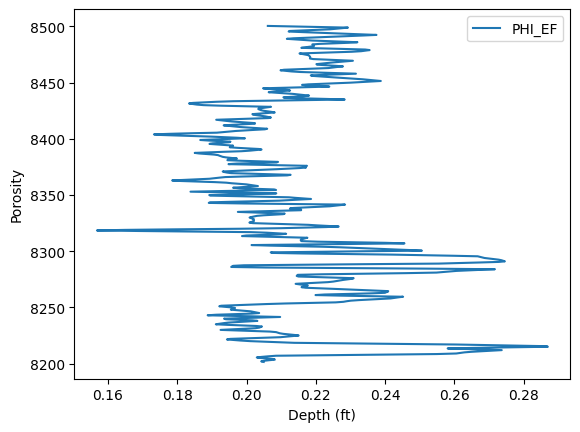

In [25]:
plt.plot(PHI_EF, depth_F, label='PHI_EF')
plt.xlabel('Depth (ft)')
plt.ylabel('Porosity')
plt.legend()
plt.show()


## Calculation of water saturation using Dual water layer

In [26]:
# Main loop

g3 = 0
g4 = 0
depth_initial_index = len(depth_initial)

# Formation factor
Fo = 11.60  # This value is get by ploting Cw versus Co graph. Formation factor is inverse of slope.
Form_F_W = np.zeros(LENGTH)

for i in range(LENGTH):
    vQ[i] = 0.30 * (295 + 25) / (273 + temp[i] + 25)
    B[i] = 2.05 * (temp[i] + 8.5) / (22 + 8.5)
    # CEC[i] = VILL[i] * (0.25 / VCL[i]) + VMON[i] * (0.92 / VCL[i])
    Qv[i] = 3.402 / (B[i] + (3.402 * vQ[i]))
    Ccw[i] = 7 * 10**(-4) * (temp[i] + 8.5) * (temp[i] + 298)
    
    print(f"Iteration {i}: vQ[{i}] = {vQ[i]}, B[{i}] = {B[i]}, CEC[{i}] = {CEC[i]}, Qv[{i}] = {Qv[i]}, Ccw[{i}] = {Ccw[i]}")
    print("temp = ",temp[i])
    
    if i != index_new[g3]:
        Form_F[i] = Fo / (1 - (vQ[i] * Qv[i]))
        Form_F_W[i] = (Fo * (temp[i] + 273 + 25)) / (Fo + temp[i] + 273 + 25)
        
        print(f"Form_F[{i}] = {Form_F[i]}, Form_F_W[{i}] = {Form_F_W[i]}")
        
        if g4 > 1:
            Form_F[i] = Fo
            Form_F_W[i] = Fo
            g4 -= 1
            print(f"Updated Form_F[{i}] = {Form_F[i]}, Form_F_W[{i}] = {Form_F_W[i]}, g4 = {g4}")
    else:
        g4 = 0
        for j in range(i, min(i + 5, LENGTH)):
            Form_F[j] = Fo
            Form_F_W[j] = Fo
            g4 += 1
            print(f"Updated in else block: Form_F[{j}] = {Form_F[j]}, Form_F_W[{j}] = {Form_F_W[j]}, g4 = {g4}")
        
        if g3 != len(index_new) - 2:
            g3 += 1
            print(f"Updated g3 = {g3}")

Iteration 0: vQ[0] = 0.2608695652173913, B[0] = 5.276229508196721, CEC[0] = 0.0, Qv[0] = 0.5519405084507039, Ccw[0] = 20.2216
temp =  70.0
Form_F[0] = 13.551156182666784, Form_F_W[0] = 11.245521601685985
Iteration 1: vQ[1] = 0.2608695652173913, B[1] = 5.276229508196721, CEC[1] = 0.0, Qv[1] = 0.5519405084507039, Ccw[1] = 20.2216
temp =  70.0
Form_F[1] = 13.551156182666784, Form_F_W[1] = 11.245521601685985
Iteration 2: vQ[2] = 0.2608695652173913, B[2] = 5.276229508196721, CEC[2] = 0.0, Qv[2] = 0.5519405084507039, Ccw[2] = 20.2216
temp =  70.0
Form_F[2] = 13.551156182666784, Form_F_W[2] = 11.245521601685985
Iteration 3: vQ[3] = 0.2608695652173913, B[3] = 5.276229508196721, CEC[3] = 0.0, Qv[3] = 0.5519405084507039, Ccw[3] = 20.2216
temp =  70.0
Form_F[3] = 13.551156182666784, Form_F_W[3] = 11.245521601685985
Iteration 4: vQ[4] = 0.2608695652173913, B[4] = 5.276229508196721, CEC[4] = 0.0, Qv[4] = 0.5519405084507039, Ccw[4] = 20.2216
temp =  70.0
Form_F[4] = 13.551156182666784, Form_F_W[4] =

## Calculation of formation water resistivity and proporation water saturation using different equations  

## Initialise some variables

In [27]:
RW = np.zeros(LENGTH)
RW_30000= np.zeros(LENGTH)

## using Archies law

In [28]:
g1 = 0

for i in range(0, depth_initial_index-1):
    Rwapp = Rw_record[g1]
    index_N = index_new[i]
    
    if i == 0:
        for k in range(index_N, -1, -1):
            RW[k] = Rwapp * ((temp_F[index_N - 2] + 6.77) / (temp_F[k] + 6.77))
            Sw[k] = np.sqrt(RW[k] / (RT[k] * (DPHI[k] ** 2)))
            Sw[k] = min(Sw[k], 1)

    else:
        for k in range(index_N, index_new[i - 1] - 1, -1):
            RW[k] = Rwapp * ((temp_F[index_N - 2] + 6.77) / (temp_F[k] + 6.77))
            Sw[k] = np.sqrt(RW[k] / (RT[k] * (DPHI[k] ** 2)))
            Sw[k] = min(Sw[k], 1)
            
    g1 += 1


In [29]:
g1 = 0

for i in range(0, depth_initial_index-1):
    Rwapp = Rw_record[g1]
    index_N = index_new[i]+5
    
    if i == 0:
        for k in range(index_N, -1, -1):
            RW[k] = Rwapp * ((temp_F[index_N] + 6.77) / (temp_F[k] + 6.77))
            print(index_N)
            Sw[k] = np.sqrt(RW[k] / (RT[k] * (DPHI[k] ** 2)))
            Sw[k] = min(Sw[k], 1)
            print(f"RW[{k}] = {RW[k]}, Sw[{k}] = {Sw[k]}")

    else:
        for k in range(index_N, index_new[i] - 1, -1):
            print(index_N)
            RW[k] = Rwapp * ((temp_F[index_N] + 6.77) / (temp_F[k] + 6.77))
            Sw[k] = np.sqrt(RW[k] / (RT[k] * (DPHI[k] ** 2)))
            Sw[k] = min(Sw[k], 1)
            print(f"RW[{k}] = {RW[k]}, Sw[{k}] = {Sw[k]}")
            
    g1 += 1

136
RW[136] = 0.16190274369810861, Sw[136] = 0.9463573647020241
136
RW[135] = 0.16190274369810861, Sw[135] = 0.9566132963638221
136
RW[134] = 0.16190274369810861, Sw[134] = 0.9732876956766962
136
RW[133] = 0.16190274369810861, Sw[133] = 0.9908578239268387
136
RW[132] = 0.16190274369810861, Sw[132] = 0.9759448973711469
136
RW[131] = 0.16190274369810861, Sw[131] = 0.9226621905587633
136
RW[130] = 0.16190274369810861, Sw[130] = 0.8753604117926771
136
RW[129] = 0.16190274369810861, Sw[129] = 0.8377410527744354
136
RW[128] = 0.16190274369810861, Sw[128] = 0.8305133180361052
136
RW[127] = 0.16190274369810861, Sw[127] = 0.8241096150718011
136
RW[126] = 0.16190274369810861, Sw[126] = 0.818508357916325
136
RW[125] = 0.16190274369810861, Sw[125] = 0.8412546143595923
136
RW[124] = 0.16190274369810861, Sw[124] = 0.8695797800796976
136
RW[123] = 0.16190274369810861, Sw[123] = 0.899566986784261
136
RW[122] = 0.16190274369810861, Sw[122] = 0.9703848728139461
136
RW[121] = 0.16190274369810861, Sw[121]

## Rw using salinity

In [30]:
g1 = 0

for i in range(0, depth_initial_index-1):
    Rwapp = Rw_record[g1]
    index_N = index_new[i]+5
    
    if i == 0:
        for k in range(index_N, -1, -1):
            if Vshale[k] < 0.5:
                Sw_30000[k] = Sw[k]
                RW_30000[k] = RW[k]
            else:
                if diff[k] < 0.08 and RT[k] < 6:
                    Sw_30000[k] = Sw[k]
                    RW_30000[k] = RW[k]
                if diff[k] < 0.08 and RT[k] > 30:
                    RW_30000[k] = (0.0123 + (3647.5 / (30000**0.955))) * (81.77 / (temp_F[k] + 6.77))
                    Sw_30000[k] = np.sqrt(RW_30000[k] / (RT[k] * (DPHI[k]**2)))
                    Sw_30000[k] = min(Sw_30000[k], 1)
            print(f"RW_30000[{k}] = {RW_30000[k]}, Sw_30000[{k}] = {Sw_30000[k]}")

            

    else:
        for k in range(index_N, index_new[i] - 1, -1):
            if Vshale[k] < 0.5:
                Sw_30000[k] = Sw[k]
                RW_30000[k] = RW[k]
            else:
                if diff[k] < 0.08 and RT[k] < 6:
                    Sw_30000[k] = Sw[k]
                    RW_30000[k] = RW[k]
                if diff[k] < 0.08 and RT[k] > 30:
                    RW_30000[k] = (0.0123 + (3647.5 / (30000**0.955))) * (81.77 / (temp_F[k] + 6.77))
                    Sw_30000[k] = np.sqrt(RW_30000[k] / (RT[k] * (DPHI[k]**2)))
                    Sw_30000[k] = min(Sw_30000[k], 1)
            print(f"RW_30000[{k}] = {RW_30000[k]}, Sw_30000[{k}] = {Sw_30000[k]}")
            
    g1 += 1


RW_30000[136] = 0.16658107364919417, Sw_30000[136] = 0.9599329303808736
RW_30000[135] = 0.16190274369810861, Sw_30000[135] = 0.9566132963638221
RW_30000[134] = 0.16190274369810861, Sw_30000[134] = 0.9732876956766962
RW_30000[133] = 0.16190274369810861, Sw_30000[133] = 0.9908578239268387
RW_30000[132] = 0.16190274369810861, Sw_30000[132] = 0.9759448973711469
RW_30000[131] = 0.16190274369810861, Sw_30000[131] = 0.9226621905587633
RW_30000[130] = 0.16190274369810861, Sw_30000[130] = 0.8753604117926771
RW_30000[129] = 0.16190274369810861, Sw_30000[129] = 0.8377410527744354
RW_30000[128] = 0.16190274369810861, Sw_30000[128] = 0.8305133180361052
RW_30000[127] = 0.16190274369810861, Sw_30000[127] = 0.8241096150718011
RW_30000[126] = 0.16190274369810861, Sw_30000[126] = 0.818508357916325
RW_30000[125] = 0.16190274369810861, Sw_30000[125] = 0.8412546143595923
RW_30000[124] = 0.16190274369810861, Sw_30000[124] = 0.8695797800796976
RW_30000[123] = 0.16190274369810861, Sw_30000[123] = 0.8995669867

## Saturatiuon using simandoux model

In [31]:
g1 = 0

for i in range(0, depth_initial_index-1):
    Rwapp = Rw_record[g1]
    index_N = index_new[i]+5
    
    if i == 0:
        for k in range(index_N, -1, -1):
            Sw_SIM[k] = (0.4 * RW[k] / (PHI_EF[k]**2)) * (np.sqrt((5 * PHI_EF[k]**2) / (RW[k] * RT[k])) + (Vsh_SIM[k] / Rsh)**2 - (Vsh_SIM[k] / Rsh))
            Sw_SIM[k] = min(Sw_SIM[k], 1)
            print(f"Sw_SIM[{k}] = {Sw_SIM[k]}")

    else:
        for k in range(index_N, index_new[i] - 1, -1):
            Sw_SIM[k] = (0.4 * RW[k] / (PHI_EF[k]**2)) * (np.sqrt((5 * PHI_EF[k]**2) / (RW[k] * RT[k])) + (Vsh_SIM[k] / Rsh)**2 - (Vsh_SIM[k] / Rsh))
            Sw_SIM[k] = min(Sw_SIM[k], 1)
            print(f"Sw_SIM[{k}] = {Sw_SIM[k]}")
            
    g1 += 1


Sw_SIM[136] = 0.800544844990117
Sw_SIM[135] = 0.7862850468918976
Sw_SIM[134] = 0.7843577453578326
Sw_SIM[133] = 0.7822706197552123
Sw_SIM[132] = 0.775889554733399
Sw_SIM[131] = 0.7637441517948629
Sw_SIM[130] = 0.7511666390590896
Sw_SIM[129] = 0.738238260842644
Sw_SIM[128] = 0.7262240371927424
Sw_SIM[127] = 0.7147180017100018
Sw_SIM[126] = 0.7037451862142133
Sw_SIM[125] = 0.7086737762882189
Sw_SIM[124] = 0.7156691090581225
Sw_SIM[123] = 0.7223974687633167
Sw_SIM[122] = 0.7631182236902702
Sw_SIM[121] = 0.8364191411216825
Sw_SIM[120] = 0.9241215365860889
Sw_SIM[119] = 0.9783950787361
Sw_SIM[118] = 0.9216756585888085
Sw_SIM[117] = 0.8646252178414292
Sw_SIM[116] = 0.8101133250076148
Sw_SIM[115] = 0.8055000390940313
Sw_SIM[114] = 0.8009288013496364
Sw_SIM[113] = 0.7963904916247809
Sw_SIM[112] = 0.8104166500465215
Sw_SIM[111] = 0.8313448654489243
Sw_SIM[110] = 0.8529659483515392
Sw_SIM[109] = 0.8679267144848409
Sw_SIM[108] = 0.8743288143454843
Sw_SIM[107] = 0.8800261013003057
Sw_SIM[106] = 0.

## Saturation using dual water model

In [32]:
g1 = 0

for i in range(0, depth_initial_index-1):
    Rwapp = Rw_record[g1]
    index_N = index_new[i]+5
    
    if i == 0:
        for k in range(index_N, -1, -1):
            a1 = (1 / (Form_F[k] * RW[k]))
            a2 = vQ[k] * Qv[k] * (Ccw[k] - (1 / RW[k])) / Form_F[k]
            a3 = -1 / RT[k]
            p = [a1, a2, a3]
            r = np.roots(p)
            
            for kw in range(2):
                if 0 < r[kw] < 2:
                    Sw_D_Layer[k] = r[kw]
                    Sw_D_Layer[k] = min(Sw_D_Layer[k], 1)
            print(f"Sw_D_Layer[{k}] = {Sw_D_Layer[k]}")
            

    else:
        for k in range(index_N, index_new[i] - 1, -1):
            a1 = (1 / (Form_F[k] * RW[k]))
            a2 = vQ[k] * Qv[k] * (Ccw[k] - (1 / RW[k])) / Form_F[k]
            a3 = -1 / RT[k]
            p = [a1, a2, a3]
            r = np.roots(p)
            
            for kw in range(2):
                if 0 < r[kw] < 2:
                    Sw_D_Layer[k] = r[kw]
                    Sw_D_Layer[k] = min(Sw_D_Layer[k], 1)
            print(f"Sw_D_Layer[{k}] = {Sw_D_Layer[k]}")
            
    g1 += 1

Sw_D_Layer[136] = 0.5491254281769768
Sw_D_Layer[135] = 0.5446071651527801
Sw_D_Layer[134] = 0.544215754776214
Sw_D_Layer[133] = 0.5438335269690887
Sw_D_Layer[132] = 0.5442752722654116
Sw_D_Layer[131] = 0.5458284091217874
Sw_D_Layer[130] = 0.6012032464655437
Sw_D_Layer[129] = 0.6041186088041851
Sw_D_Layer[128] = 0.6140558115477202
Sw_D_Layer[127] = 0.6244141748708641
Sw_D_Layer[126] = 0.6352239431273194
Sw_D_Layer[125] = 0.6415612831909171
Sw_D_Layer[124] = 0.6473165919414474
Sw_D_Layer[123] = 0.6532042096614136
Sw_D_Layer[122] = 0.6801548797075032
Sw_D_Layer[121] = 0.7275042866042603
Sw_D_Layer[120] = 0.7843472158250027
Sw_D_Layer[119] = 0.8247599610642925
Sw_D_Layer[118] = 0.8056655962184973
Sw_D_Layer[117] = 0.7876750055932694
Sw_D_Layer[116] = 0.7708271103055506
Sw_D_Layer[115] = 0.7596303282398205
Sw_D_Layer[114] = 0.7488425998302344
Sw_D_Layer[113] = 0.7384555451675388
Sw_D_Layer[112] = 0.7398127984482732
Sw_D_Layer[111] = 0.7451453119990491
Sw_D_Layer[110] = 0.7505612085049033
Sw

## Complete code

In [33]:
g1 = 0

for i in range(0, depth_initial_index-1):
    Rwapp = Rw_record[g1]
    index_N = index_new[i]+5


    
    if i == 0:
        for k in range(index_N, -1, -1):
            RW[k] = Rwapp * ((temp_F[index_N ] + 6.77) / (temp_F[k] + 6.77))
            print(index_N)
            Sw[k] = np.sqrt(RW[k] / (RT[k] * (DPHI[k] ** 2)))
            Sw[k] = min(Sw[k], 1)
            print(f"RW[{k}] = {RW[k]}, Sw[{k}] = {Sw[k]}")


            if Vshale[k] > 0.5:
                if diff[k] < 0.08 and RT[k] < 6:
                    Sw_30000[k] = Sw[k]
                    RW_30000[k] = Sw[k]
                if diff[k] < 0.08 and RT[k] > 30:
                    RW_30000[k] = (0.0123 + (3647.5 / (30000**0.955))) * (81.77 / (temp_F[k] + 6.77))
                    Sw_30000[k] = np.sqrt(RW_30000[k] / (RT[k] * (DPHI[k]**2)))
                    Sw_30000[k] = min(Sw_30000[k], 1)
            print(f"RW_30000[{k}] = {RW_30000[k]}, Sw_30000[{k}] = {Sw_30000[k]}")



            Sw_SIM[k] = (0.4 * RW[k] / (PHI_EF[k]**2)) * (np.sqrt((5 * PHI_EF[k]**2) / (RW[k] * RT[k])) + (Vsh_SIM[k] / Rsh)**2 - (Vsh_SIM[k] / Rsh))
            Sw_SIM[k] = min(Sw_SIM[k], 1)
            print(f"Sw_SIM[{k}] = {Sw_SIM[k]}")


            a1 = (1 / (Form_F[k] * RW[k]))
            a2 = vQ[k] * Qv[k] * (Ccw[k] - (1 / RW[k])) / Form_F[k]
            a3 = -1 / RT[k]
            p = [a1, a2, a3]
            r = np.roots(p)
            
            for kw in range(2):
                if 0 < r[kw] < 2:
                    Sw_D_Layer[k] = r[kw]
                    Sw_D_Layer[k] = min(Sw_D_Layer[k], 1)
            print(f"Sw_D_Layer[{k}] = {Sw_D_Layer[k]}")
    
    else:
        for k in range(index_N, index_new[i] - 1, -1):
            print(index_N)
            RW[k] = Rwapp * ((temp_F[index_N ] + 6.77) / (temp_F[k] + 6.77))
            Sw[k] = np.sqrt(RW[k] / (RT[k] * (DPHI[k] ** 2)))
            Sw[k] = min(Sw[k], 1)
            print(f"RW[{k}] = {RW[k]}, Sw[{k}] = {Sw[k]}")


            if Vshale[k] < 0.5:
                Sw_30000[k] = Sw[k]
                RW_30000[k] = Sw[k]
            else:
                if diff[i] < 0.08 and RT[i] < 6:
                    Sw_30000[k] = Sw[k]
                    RW_30000[k] = Sw[k]
                if diff[i] < 0.08 and RT[i] > 30:
                    RW_30000[k] = (0.0123 + (3647.5 / (30000**0.955))) * (81.77 / (temp_F[k] + 6.77))
                    Sw_30000[k] = np.sqrt(RW_30000[k] / (RT[k] * (DPHI[k]**2)))
                    Sw_30000[k] = min(Sw_30000[k], 1)
            print(f"RW_30000[{k}] = {RW_30000[k]}, Sw_30000[{k}] = {Sw_30000[k]}")


            Sw_SIM[k] = (0.4 * RW[k] / (PHI_EF[k]**2)) * (np.sqrt((5 * PHI_EF[k]**2) / (RW[k] * RT[k])) + (Vsh_SIM[k] / Rsh)**2 - (Vsh_SIM[k] / Rsh))
            Sw_SIM[k] = min(Sw_SIM[k], 1)
            print(f"Sw_SIM[{k}] = {Sw_SIM[k]}")


            a1 = (1 / (Form_F[k] * RW[k]))
            a2 = vQ[k] * Qv[k] * (Ccw[k] - (1 / RW[k])) / Form_F[k]
            a3 = -1 / RT[k]
            p = [a1, a2, a3]
            r = np.roots(p)
            
            for kw in range(2):
                if 0 < r[kw] < 2:
                    Sw_D_Layer[k] = r[kw]
                    Sw_D_Layer[k] = min(Sw_D_Layer[k], 1)
            print(f"Sw_D_Layer[{k}] = {Sw_D_Layer[k]}")
            
    g1 += 1

136
RW[136] = 0.16190274369810861, Sw[136] = 0.9463573647020241
RW_30000[136] = 0.16658107364919417, Sw_30000[136] = 0.9599329303808736
Sw_SIM[136] = 0.7898410003775581
Sw_D_Layer[136] = 0.5447179075827757
136
RW[135] = 0.16190274369810861, Sw[135] = 0.9566132963638221
RW_30000[135] = 0.16190274369810861, Sw_30000[135] = 0.9566132963638221
Sw_SIM[135] = 0.7862850468918976
Sw_D_Layer[135] = 0.5446071651527801
136
RW[134] = 0.16190274369810861, Sw[134] = 0.9732876956766962
RW_30000[134] = 0.16190274369810861, Sw_30000[134] = 0.9732876956766962
Sw_SIM[134] = 0.7843577453578326
Sw_D_Layer[134] = 0.544215754776214
136
RW[133] = 0.16190274369810861, Sw[133] = 0.9908578239268387
RW_30000[133] = 0.16190274369810861, Sw_30000[133] = 0.9908578239268387
Sw_SIM[133] = 0.7822706197552123
Sw_D_Layer[133] = 0.5438335269690887
136
RW[132] = 0.16190274369810861, Sw[132] = 0.9759448973711469
RW_30000[132] = 0.16190274369810861, Sw_30000[132] = 0.9759448973711469
Sw_SIM[132] = 0.775889554733399
Sw_D_Laye

## For rest index

In [34]:
index_N = index_new[depth_initial_index - 1]
print(index_N)

for k in range(index_N, LENGTH):
    RW[k] = Rwapp * ((temp_F[index_N ] + 6.77) / (temp_F[k] + 6.77))
    print(index_N)
    Sw[k] = np.sqrt(RW[k] / (RT[k] * (DPHI[k] ** 2)))
    Sw[k] = min(Sw[k], 1)
    print(f"RW[{k}] = {RW[k]}, Sw[{k}] = {Sw[k]}")
    
    if Vshale[k] > 0.5:
        if diff[k] < 0.08 and RT[k] < 6:
            Sw_30000[k] = Sw[k]
            RW_30000[k] = Sw[k]
        if diff[k] < 0.08 and RT[k] > 30:
            RW_30000[k] = (0.0123 + (3647.5 / (30000**0.955))) * (81.77 / (temp_F[k] + 6.77))
            Sw_30000[k] = np.sqrt(RW_30000[k] / (RT[k] * (DPHI[k]**2)))
            Sw_30000[k] = min(Sw_30000[k], 1)
        print(f"RW_30000[{k}] = {RW_30000[k]}, Sw_30000[{k}] = {Sw_30000[k]}")
    
    Sw_SIM[k] = (0.4 * RW[k] / (PHI_EF[k]**2)) * (
        np.sqrt((5 * PHI_EF[k]**2) / (RW[k] * RT[k])) + (Vsh_SIM[k] / Rsh)**2 - (Vsh_SIM[k] / Rsh))
    Sw_SIM[k] = min(Sw_SIM[k], 1)
    print(f"Sw_SIM[{k}] = {Sw_SIM[k]}")
    
    a1 = (1 / (Form_F[k] * RW[k]))
    a2 = vQ[k] * Qv[k] * (Ccw[k] - (1 / RW[k])) / Form_F[k]
    a3 = -1 / RT[k]
    p = [a1, a2, a3]
    r = np.roots(p)
            
    for kw in range(2):
        if 0 < r[kw] < 2:
            Sw_D_Layer[k] = r[kw]
            Sw_D_Layer[k] = min(Sw_D_Layer[k], 1)
    print(f"Sw_D_Layer[{k}] = {Sw_D_Layer[k]}")


156
156
RW[156] = 0.20130225582700945, Sw[156] = 1.0
Sw_SIM[156] = 1.0
Sw_D_Layer[156] = 0.7940229385125611
156
RW[157] = 0.20130225582700945, Sw[157] = 1.0
Sw_SIM[157] = 0.9819730040114983
Sw_D_Layer[157] = 0.8097483124872775
156
RW[158] = 0.20130225582700945, Sw[158] = 0.9977077273570456
Sw_SIM[158] = 0.9553118659316812
Sw_D_Layer[158] = 0.826258858227635
156
RW[159] = 0.20130225582700945, Sw[159] = 0.9710875551496193
Sw_SIM[159] = 0.9381178065868557
Sw_D_Layer[159] = 0.8393107640551485
156
RW[160] = 0.20130225582700945, Sw[160] = 0.9815367157739833
Sw_SIM[160] = 0.9362440377390344
Sw_D_Layer[160] = 0.8434993852527245
156
RW[161] = 0.20130225582700945, Sw[161] = 0.9924041330406684
Sw_SIM[161] = 0.9342731596176076
Sw_D_Layer[161] = 0.8477616608626503
156
RW[162] = 0.20130225582700945, Sw[162] = 1.0
Sw_SIM[162] = 0.9318294665725275
Sw_D_Layer[162] = 0.8522039656459227
156
RW[163] = 0.20130225582700945, Sw[163] = 0.9802600614786462
Sw_SIM[163] = 0.9245698146007729
Sw_D_Layer[163] = 0.86

## 

# Make data frame for calculated parameters

In [35]:
df = pd.DataFrame()
df['RHOM'] = RHOM
df['DPHI'] = DPHI
df['CILD'] = CILD
df['Vshale'] = Vshale
df['diff'] = diff
df['Vsh_SIM'] = Vsh_SIM
df['PHI_EF'] = PHI_EF
df['Form_F'] = Form_F
df['Form_F_W'] = Form_F_W
df['RW'] = RW
df['Sw'] = Sw
df['RW_30000'] = RW_30000
df['Sw_30000'] = Sw_30000
df['Sw_SIM'] = Sw_SIM
df['Sw_D_Layer'] = Sw_D_Layer


In [36]:
df.head()

,RHOM,DPHI,CILD,Vshale,diff,Vsh_SIM,PHI_EF,Form_F,Form_F_W,RW,Sw,RW_30000,Sw_30000,Sw_SIM,Sw_D_Layer
0,2.676418,0.136015,159.020434,0.528370,0.224988,0.356474,0.204954,13.551156,11.245522,0.163671,1.0,0.000000,0.0,0.577530,0.450442
1,2.675314,0.133655,152.281172,0.506279,0.228133,0.335770,0.204230,13.551156,11.245522,0.163671,1.0,0.000000,0.0,0.570711,0.438202
2,2.674535,0.125907,148.639208,0.490704,0.248975,0.321549,0.205012,13.551156,11.245522,0.163671,1.0,0.163671,1.0,0.565335,0.431483
3,2.673838,0.116820,145.787471,0.476754,0.274210,0.309070,0.206431,13.551156,11.245522,0.163671,1.0,0.163671,1.0,0.559757,0.426169
4,2.673140,0.107785,143.043099,0.462805,0.299343,0.296830,0.208150,13.551156,11.245522,0.163671,1.0,0.163671,1.0,0.553677,0.421010


## Plots of Input Logs

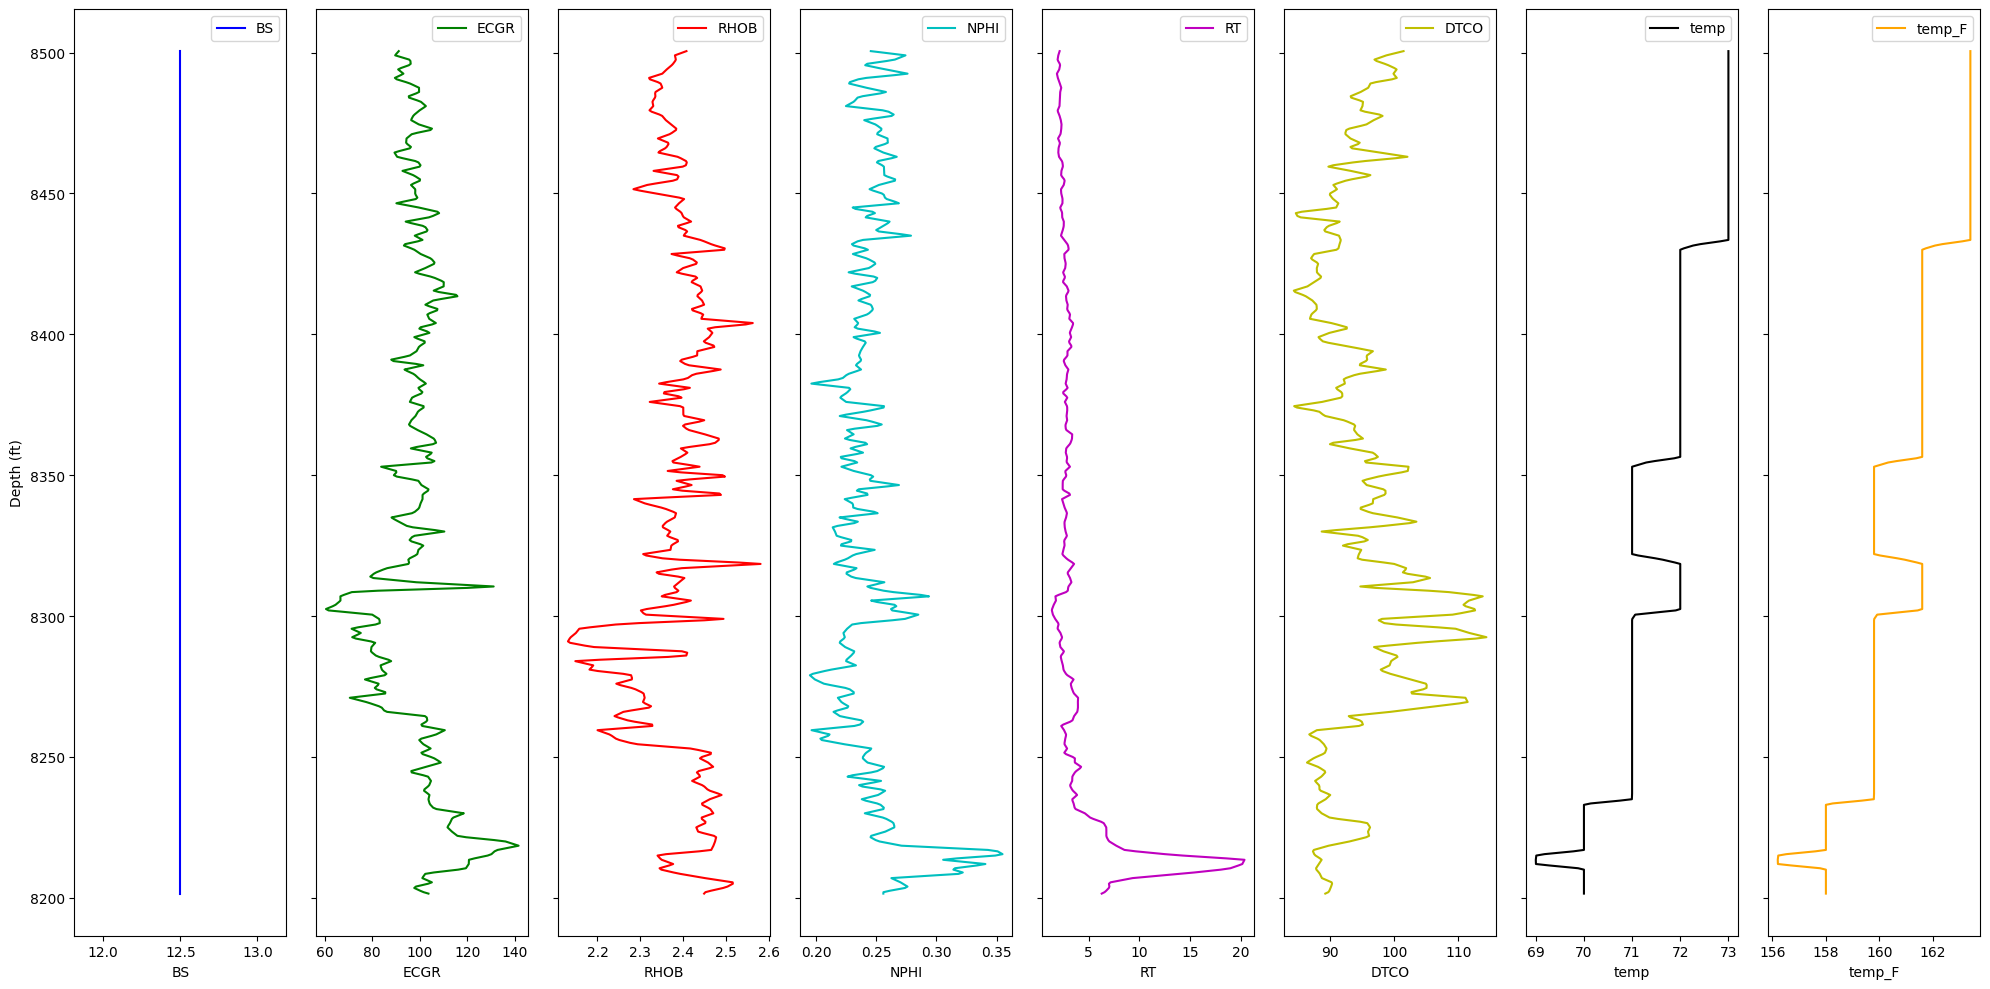

In [39]:
# Creating a dictionary to map new variable names to columns
series_to_plot = {
    'BS': BS,
    'ECGR': ECGR,
    'RHOB': RHOB,
    'NPHI': NPHI,
    'RT': RT,
    'DTCO': DTCO,
    'temp' : temp,
    'temp_F': temp_F
    
}

# List of colors
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange']

# Creating subplots
fig, axs = plt.subplots(nrows=1, ncols=len(series_to_plot), figsize=(20, 10), sharey=True)

# Plotting each series with different colors
for ax, (label, series), color in zip(axs, series_to_plot.items(), colors):
    ax.plot(series, depth_F, label=label, color=color)
    ax.set_xlabel(label)
    ax.invert_yaxis()  # Depth typically increases downwards
    ax.legend()

axs[0].set_ylabel('Depth (ft)')

plt.tight_layout()
plt.show()

## Plots of output logs

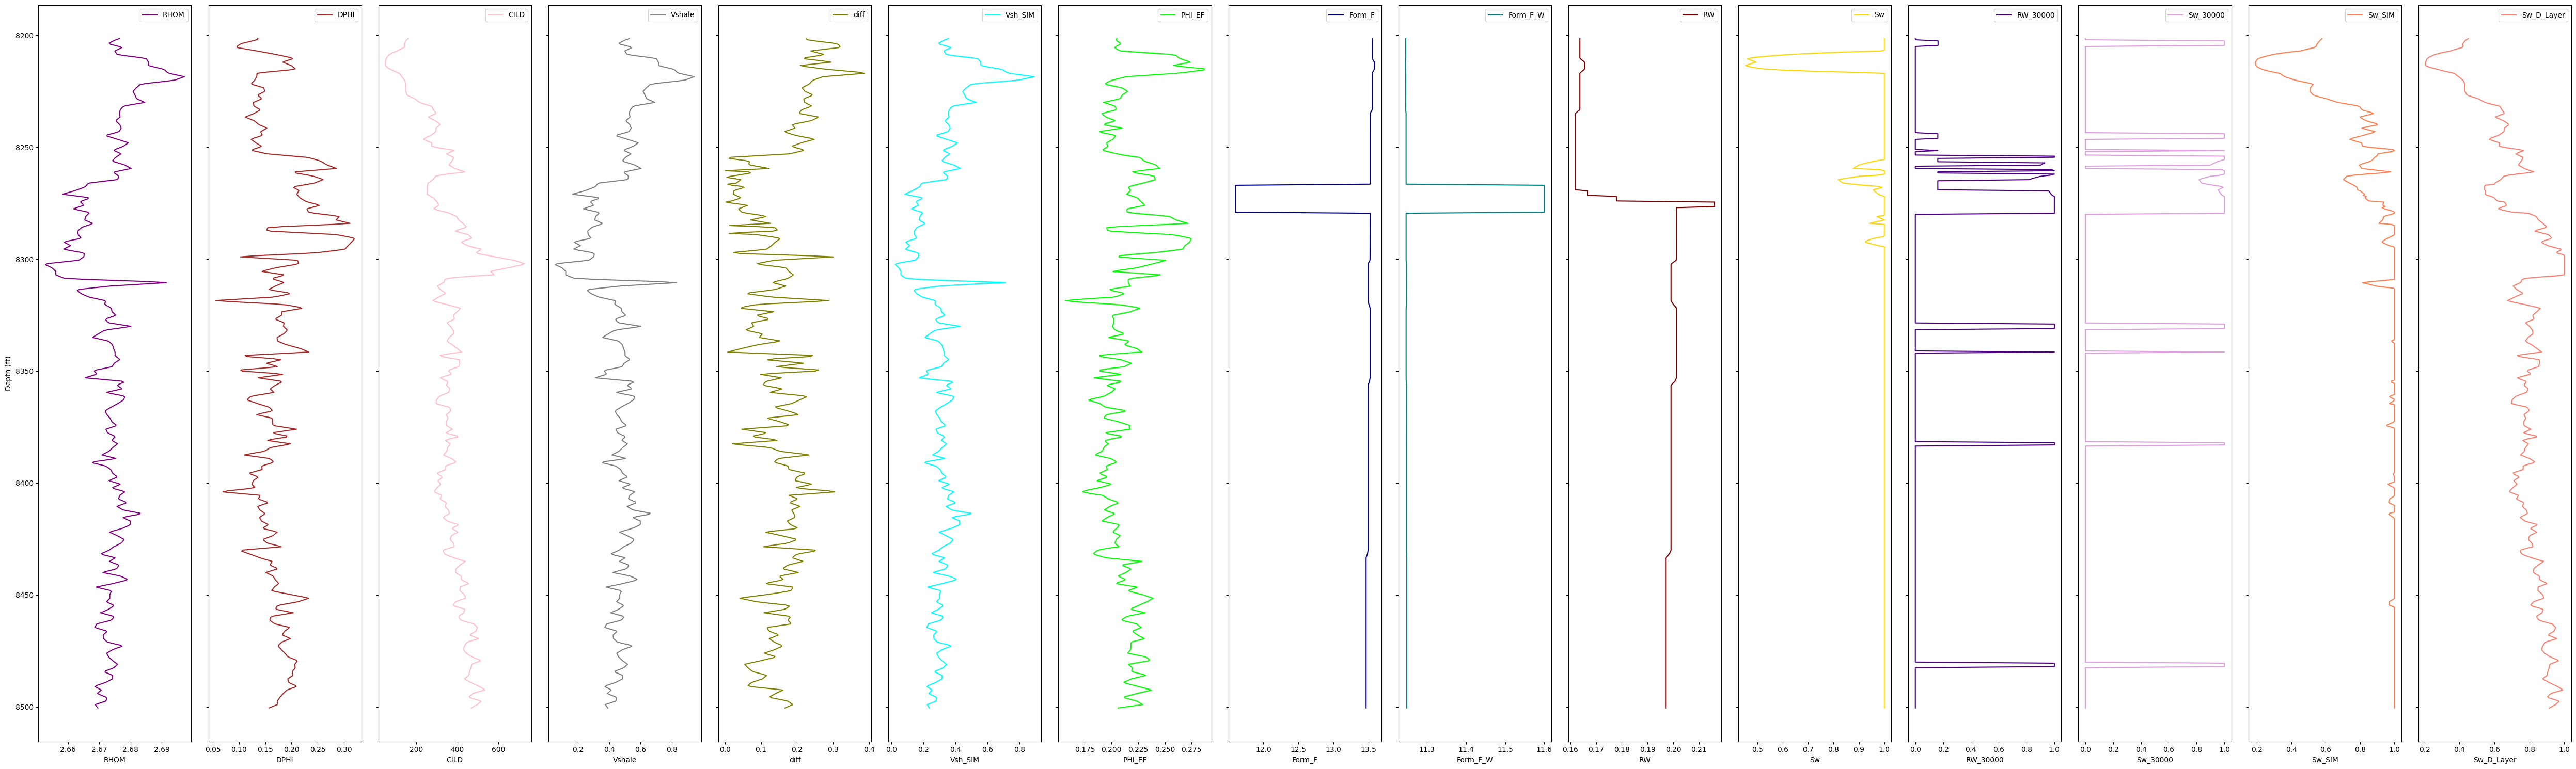

In [40]:
import matplotlib.pyplot as plt
import pandas as pd


# Creating a dictionary to map new variable names to columns
series_to_plot = {
    
    'RHOM': RHOM,
    'DPHI': DPHI,
    'CILD': CILD,
    'Vshale': Vshale,
    'diff': diff,
    'Vsh_SIM': Vsh_SIM,
    'PHI_EF': PHI_EF,
    'Form_F': Form_F,
    'Form_F_W': Form_F_W,
    'RW': RW,
    'Sw': Sw,
    'RW_30000': RW_30000,
    'Sw_30000': Sw_30000,
    'Sw_SIM': Sw_SIM,
    'Sw_D_Layer': Sw_D_Layer,
}

# List of colors
colors = ['purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'lime', 'navy', 'teal', 'maroon', 'gold', 'indigo', 'plum', 'coral', 'salmon']

# Creating subplots
fig, axs = plt.subplots(nrows=1, ncols=len(series_to_plot), figsize=(50, 15), sharey=True)

# Plotting each series with different colors
for ax, (label, series), color in zip(axs, series_to_plot.items(), colors):
    ax.plot(series, depth_F, label=label, color=color)
    ax.set_xlabel(label)
    ax.invert_yaxis()  # Depth typically increases downwards
    ax.legend()

axs[0].set_ylabel('Depth (ft)')

plt.tight_layout()
plt.show()
